In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


# Regressão Linear 

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

In [5]:
# Separando as colunas em numéricas e categóricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()


In [6]:
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove('Id_do_imovel')
object_cols.remove('Endereco_Municipio')
object_cols.remove('geometry')

In [7]:
# Vamos assegurar que 'Preco' está na lista de colunas numéricas
if 'Preco' not in numeric_cols:
    raise ValueError("'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.")
    
numeric_cols.remove('Preco')  # Removendo a coluna 'Preco' dos dados de entrada
numeric_cols.remove('Preco_por_metro_quadrado') # Removendo a coluna 'Preco_por_metro_quadrado' dos dados de entrada

In [8]:
# Separamos o dataframe em features (X) e target (y)
X = df_final[numeric_cols + object_cols]
y = df_final['Preco']

In [9]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Pipeline para as colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=numeric_cols, imputation_method='median')),
    ('numeric_scaler', SklearnTransformerWrapper(variables=numeric_cols, transformer=StandardScaler())),])


In [11]:
object_cols

['Indicador_de_Elevador',
 'Distrito_do_imovel',
 'Tipo_de_Certificacao_Energetica',
 'Nome_Regiao',
 'Nome_Cidade']

In [12]:
# Pipeline para as colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])


In [13]:
# Juntando as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, object_cols)])

In [14]:
# Criando o modelo de regressão linear
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [15]:
# Treinando o modelo com o conjunto de treino
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                                                                                'Numero_Andar_do_imovel',
                                                                                                'Latitude_imovel',
                                                                                                'Longitude_imovel',
                                                                                                'Tipo_de_Construcao',
                                                                                                'Numero_de_Banheiros',
                                                                                                'Possui_Jardim',
                                                                                                'Possui_Elevador',
                                                                                                'Possui_Estacionamento',
                                                                                                'Possui_Piscina',
                                                                                                'Possui...
                                                   'Quantidade_Escolas_Pre-Escolar_(4-6_anos)',
                                                   'Quantidade_Escolas_Ciclo_1_(6-10_anos)', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Indicador_de_Elevador',
                                                   'Distrito_do_imovel',
                                                   'Tipo_de_Certificacao_Energetica',
                                                   'Nome_Regiao',
                                                   'Nome_Cidade'])])),
                ('regressor', LinearRegression())])

In [16]:
# Predizendo os valores para o conjunto de teste
y_pred = model.predict(X_test)

In [17]:
# Calculando e imprimindo as métricas
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): ', r2_score(y_test, y_pred))


Mean squared error:  53373.84957961114
Coefficient of determination (R^2):  0.6604196633883896


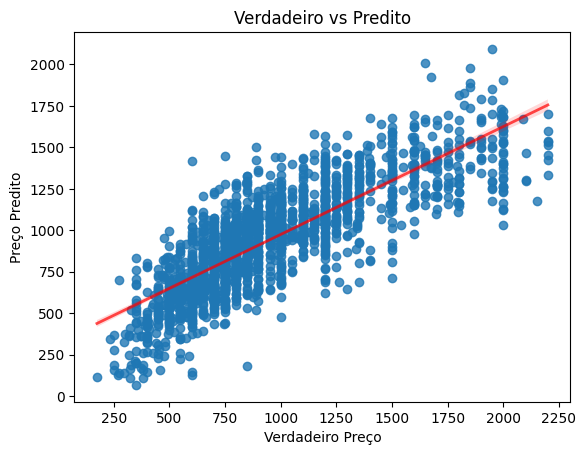

In [18]:
# Plotando o gráfico
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Verdadeiro Preço')
plt.ylabel('Preço Predito')
plt.title('Verdadeiro vs Predito')
plt.show()

In [19]:
# Obtendo os coeficientes da regressão linear
linear_regressor = model.named_steps['regressor']
coef = linear_regressor.coef_
intercept = linear_regressor.intercept_

In [20]:
intercept

366112013177963.7

In [21]:
coef

array([ 1.30159522e+02,  2.20762953e+00, -3.69686664e+02, -3.93154744e+01,
       -2.38562876e-02,  7.79064965e+01,  1.18987143e+01,  8.42417239e+01,
        2.72847810e+01,  2.23504655e+01, -1.07731138e+01,  3.54470042e+01,
        9.07309807e+00,  2.68748915e+01,  3.93488462e+00,  4.23347484e+12,
        5.97238677e+01,  4.28968577e+13, -5.00519328e+13, -1.74691673e+14,
       -1.28354444e+14,  8.64056606e+12,  8.03219336e+13, -2.84114758e+14,
        6.26134384e+13, -3.74240943e+14, -1.23166752e+14, -1.29751460e+14,
        2.24435908e+14, -1.68437293e+13,  2.71132013e+14,  6.73745262e+14,
        5.15019965e+14, -3.46530333e+13,  2.48995610e+14,  9.19600026e+13,
       -6.18000690e+14,  2.56804446e+13, -1.02972414e+14, -8.04986702e+12,
       -6.48051250e+13,  1.77516575e+13,  1.06791478e+14, -6.55402154e+13,
        8.47009585e+13, -4.68710560e+13, -8.50473735e+12, -8.50473735e+12,
       -8.50473735e+12,  2.17539704e+13, -2.08609453e+13,  6.25805243e+13,
       -5.27541215e+13,  

In [24]:
# Obtendo os nomes das colunas após o one-hot encoding
one_hot_columns = list(model.named_steps['preprocessor'].
                       named_transformers_['cat'].
                       named_steps['one_hot_encoder'].
                       get_feature_names_out(object_cols))

In [25]:
# Criando uma lista com todos os nomes das colunas
all_columns = numeric_cols + one_hot_columns

# Imprimindo a equação da regressão
equation = "Preco = " + str(intercept)
for i in range(len(coef)):
    equation += " + " + str(coef[i]) + "*" + all_columns[i]

print("A equação da regressão é:")
print(equation)

A equação da regressão é:
Preco = 366112013177963.7 + 130.15952165450275*Valor_Area_util_do_imovel + 2.2076295264641175*Numero_Andar_do_imovel + -369.68666358233463*Latitude_imovel + -39.315474427964*Longitude_imovel + -0.023856287636151663*Tipo_de_Construcao + 77.90649647145771*Numero_de_Banheiros + 11.898714317269047*Possui_Jardim + 84.24172394516819*Possui_Elevador + 27.28478099927831*Possui_Estacionamento + 22.35046554036576*Possui_Piscina + -10.773113779459564*Possui_Terraco + 35.4470042395137*Numero_de_Quartos + 9.073098068811952*Indicador_Anuncio_possui_planta_baixa + 26.874891496526367*Numero_de_fotos_do_anuncio + 3.9348846187485513*Numero_de_videos_do_anuncio + 4233474842849.3086*Tipo_de_Operacao + 59.7238677251183*Tipo_de_proprietario + 42896857723644.08*Numero_Faixa_Etaria_0-14 + -50051932767475.03*Numero_Faixa_Etaria_15-64 + -174691672810235.7*Numero_Faixa_Etaria_>65 + -128354444101661.78*Percentual_Faixa_Etaria_0-14 + 8640566064539.876*Percentual_Faixa_Etaria_15-64 + 80321

In [26]:

# Obtendo os coeficientes da regressão linear e ordenando em ordem decrescente
coef = linear_regressor.coef_
sorted_indices = np.argsort(np.abs(coef))[::-1]

print("As 10 características mais importantes são:")
for i in range(20):
    print(f"{all_columns[sorted_indices[i]]}: {coef[sorted_indices[i]]}")


As 10 características mais importantes são:
Quantidade_Escolas_Ciclo_3_(13-15_anos): 673745262230734.5
Percentual_Poder_de_Compra: -618000690195020.1
Nome_Cidade_LISBOA: -544634724601814.3
Quantidade_Shows_Exibicoes_Teatro: 515019965113204.7
Distrito_do_imovel_LISBOA: -401863146468685.8
Quantidade_Hospitais_(Particulares_e_Publicos): -374240942792970.6
Densidade_populacional_por_Km: -284114758153460.56
Quantidade_Escolas_Ciclo_2_(10-12_anos): 271132013245256.88
Renda_Media_Mensal: 248995610397687.62
Quantidade_Escolas_Pre-Escolar_(4-6_anos): 224435907764688.06
Numero_Faixa_Etaria_>65: -174691672810235.7
Nome_Regiao_Area Metropolitana de Lisboa: 168783285456631.34
Quantidade_Construcoes_Novas: -129751459731591.44
Percentual_Faixa_Etaria_0-14: -128354444101661.78
Quantidade_Farmacias: -123166751985696.56
Nome_Cidade_SETUBAL: 122867277372459.22
Distancia_dirigindo_de_Porto_Portugal: 106791478377708.78
Quantidade_Bancos: -102972414449585.23
Nome_Cidade_COIMBRA: 96031242160397.97
Distrito_d

resultados bem abaixo do esperado com acuracioa de 14% no teste

## Árvore de Decisão

In [50]:
## Árvore de Decisãotree_model_pipe.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier

tree_model_pipe = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', DecisionTreeClassifier(random_state=42))
])


In [52]:
tree_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                              'Numero_Andar_do_imovel',
                                              'Preco_por_metro_quadrado',
                                              'Latitude_imovel',
                                              'Longitude_imovel',
                                              'Tipo_de_Construcao',
                                              'Numero_de_Banheiros',
                                              'Possui_Jardim',
                                              'Possui_Elevador',
                                              'Possui_Estacionamento',
                                              'Possui_Piscina',
                                              'Possui_Terraco',
                                              'Numero_de_Quartos',
                                              'Indicador_Anu...
                 CategoricalImputer(fill_value='missing',
                                    variables=['Indicador_de_Elevador',
                                               'Distrito_do_imovel',
                                               'Tipo_de_Certificacao_Energetica',
                                               'Nome_Regiao', 'Nome_Cidade'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['Indicador_de_Elevador',
                                          'Distrito_do_imovel',
                                          'Tipo_de_Certificacao_Energetica',
                                          'Nome_Regiao', 'Nome_Cidade'])),
                ('algoritmo', DecisionTreeClassifier(random_state=42))])

In [53]:
# Avaliando o modelo na base de treino e teste
y_pred_train = tree_model_pipe.predict(X_train)
y_pred_test  = tree_model_pipe.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test, y_pred_test)

print(f"Acc de Treino: {acc_train}")
print(f"Acc de Teste: {acc_test}")

Acc de Treino: 1.0
Acc de Teste: 0.44523246650906223


A regressão logística apesar de ter tido um score menor no treino, ela possui um score melhor no teste e também é mais robusta, ou seja, a sua performance se mantém estável entre treino e teste. Enquanto a árvore de decisão acerta tudo na base de treino e erra bastante na base de teste. Dizemos que a árvore de decisão overfitou (sobreajustou) os dados de treino. É como um estudante que só decorou a resolução da lista de questões que o professor passou para estudar para a prova. Na hora da prova, em que o professor colocou questões novas, o aluno já não se sai tão bem.

## Regressão Linear


In [67]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [70]:

# Dividir os dados em conjuntos de treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o pipeline
# Neste exemplo, usaremos o StandardScaler para padronizar os recursos e a Regressão Linear para criar o modelo.
pipeline = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), [0])], remainder='passthrough')),
                ('regressor', LinearRegression())
])


In [77]:
pipeline.transform(X_test).head()

AttributeError: This 'Pipeline' has no attribute 'transform'

In [75]:
# Treinar o modelo usando o pipeline
pipeline.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = pipeline.predict(X_test)



In [76]:
y_train

795      500.0
3493     670.0
5361    1050.0
5002    1000.0
5070     700.0
         ...  
5260    1050.0
500      700.0
3885    1500.0
4517     800.0
5925     430.0
Name: Preco, Length: 5072, dtype: float64

In [72]:
# Imprimir o coeficiente angular e linear
coeficiente_angular = pipeline.named_steps['regressor'].coef_[0]
coeficiente_linear = pipeline.named_steps['regressor'].intercept_

print(f"Coeficiente Angular: {coeficiente_angular}")
print(f"Coeficiente Linear: {coeficiente_linear}")



Coeficiente Angular: 315.3570414203695
Coeficiente Linear: 2026633154672.021


TypeError: unhashable type: 'numpy.ndarray'

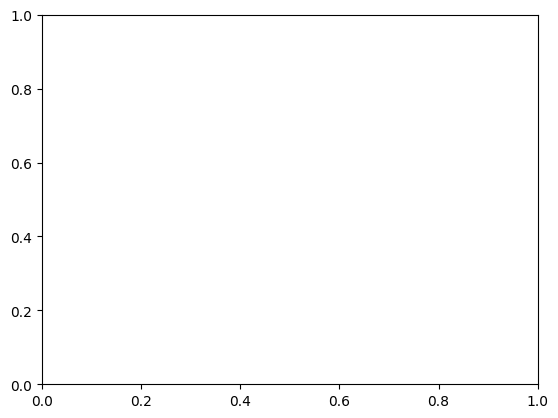

In [73]:
# Plotar os resultados
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regressão Linear usando Pipeline')
plt.show()